In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# Algorithm 1: Function to generate a single discrete random variable
# -----------------------------
def generate_discrete_rv(p, x):
    """
    Generate a discrete random variable X with given probabilities using inverse transform method.
    
    Parameters:
        p : list or np.array
            Probabilities of each outcome (p0, ..., pn), should sum to 1.
        x : list or np.array
            Corresponding outcomes (x0, ..., xn)
    
    Returns:
        X : float or int
            A single sample drawn according to probabilities p
    """
    # Draw a uniform random number U ~ Uniform(0,1)
    U = np.random.uniform(0, 1)
    
    # Initialize cumulative probability
    C = 0
    
    # Keep record of comparisons
    comparisons = 0
    
    # Loop over outcomes
    for i in range(len(p)):
        comparisons += 1
        C += p[i]  # Update cumulative probability
        if U < C:  # Check if uniform number falls in current interval
            return x[i], comparisons 
    
    return x[-1], comparisons

# -----------------------------
# Algorithm 2: Efficient Discrete Random Variable Generation
# -----------------------------
def generate_discrete_rv_efficient(p, x):
    """
    Generate a discrete random variable X using sorted cumulative probabilities
    for faster sampling when some probabilities are much larger than others.
    
    Parameters:
        p : list or np.array
            Probabilities of outcomes (p1, ..., pn)
        x : list or np.array
            Corresponding outcomes (x1, ..., xn)
    
    Returns:
        X : float or int
            A single sample drawn according to probabilities p
    """
    # Sort probabilities and outcomes in descending order
    sorted_indices = np.argsort(p)[::-1]  # Indices of descending probabilities
    p_sorted = np.array(p)[sorted_indices]
    x_sorted = np.array(x)[sorted_indices]
    
    # Compute cumulative probabilities
    F = np.cumsum(p_sorted)
    
    # Generate uniform random number
    U = np.random.uniform(0, 1)

    # Keep record of comparisons
    comparisons = 0
    
    # Find the first interval where U < cumulative probability
    for j in range(len(F)):
        comparisons += 1
        if U < F[j]:
            return x_sorted[j], comparisons
        
    return x_sorted[-1], comparisons
        
def generate_discrete_samples(p, x, n_samples=1000, type="simple"):
    """
    Generate multiple samples of a discrete random variable.
    
    Parameters:
        p : list or np.array
            Probabilities of outcomes
        x : list or np.array
            Outcomes
        n_samples : int
            Number of samples to generate
    
    Returns:
        samples : np.array
            Array of generated samples
    """
    if type == "simple":
        samples = np.array([generate_discrete_rv(p, x) for _ in range(n_samples)])
    else:
        samples = np.array([generate_discrete_rv_efficient(p, x) for _ in range(n_samples)])
    return samples

In [3]:
# -----------------------------
# Runner Code for Discrete Random Variable Demonstration
# -----------------------------
def run_discrete_rv_demo(p, x, n_samples=10000):
    """
    Demonstrates the generation of discrete random variables using:
        1. Standard inverse transform algorithm
        2. Efficient algorithm using sorted cumulative probabilities

    Plots the PMF and CDF for both methods and prints the average number 
    of comparisons needed for each method.

    Parameters:
        p : list or np.array
            Probabilities of each discrete outcome (must sum to 1)
        x : list or np.array
            Corresponding discrete outcomes
        n_samples : int, optional
            Number of random samples to generate (default: 10000)
    """

    # -----------------------------
    # Generate multiple samples using both algorithms
    # -----------------------------
    # Each sample also returns the number of comparisons performed
    samples_orig_with_comp = generate_discrete_samples(p, x, n_samples, "simple")
    samples_eff_with_comp = generate_discrete_samples(p, x, n_samples, "efficient")

    # -----------------------------
    # Separate the sampled values and comparison counts
    # -----------------------------
    # Original algorithm
    samples_orig = np.array([s[0] for s in samples_orig_with_comp])
    comparisons_orig = np.array([s[1] for s in samples_orig_with_comp])
    
    # Efficient algorithm
    samples_eff = np.array([s[0] for s in samples_eff_with_comp])
    comparisons_eff = np.array([s[1] for s in samples_eff_with_comp])

    # -----------------------------
    # Compute Probability Mass Function (PMF)
    # -----------------------------
    # PMF is estimated as the relative frequency of each outcome in the samples
    pmf_orig = [np.mean(samples_orig == xi) for xi in x]
    pmf_eff = [np.mean(samples_eff == xi) for xi in x]

    # -----------------------------
    # Compute Cumulative Distribution Function (CDF)
    # -----------------------------
    # CDF is obtained by cumulative summation of the PMF values
    cdf_orig = np.cumsum(pmf_orig)
    cdf_eff = np.cumsum(pmf_eff)

    # -----------------------------
    # Plot PMF for both algorithms
    # -----------------------------
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.bar(x, pmf_orig, alpha=0.5, label='Original Algorithm')
    plt.bar(x, pmf_eff, alpha=0.5, label='Efficient Algorithm')
    plt.title('PMF Comparison')
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.legend()

    # -----------------------------
    # Plot CDF for both algorithms
    # -----------------------------
    plt.subplot(1,2,2)
    plt.step(x, cdf_orig, where='mid', label='Original Algorithm')
    plt.step(x, cdf_eff, where='mid', label='Efficient Algorithm')
    plt.title('CDF Comparison')
    plt.xlabel('Outcome')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Print average number of comparisons for each method
    # -----------------------------
    print(f"Average comparisons (Original Algorithm): {np.mean(comparisons_orig):.2f}")
    print(f"Average comparisons (Efficient Algorithm): {np.mean(comparisons_eff):.2f}")

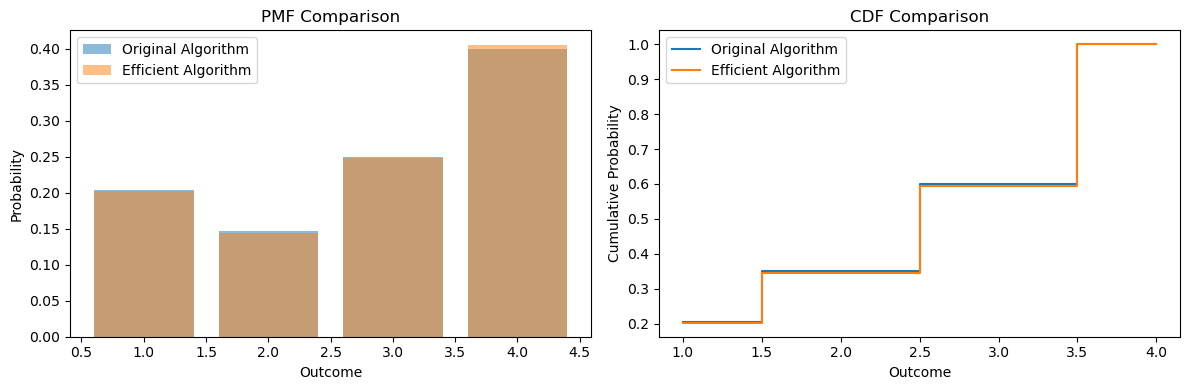

Average comparisons (Original Algorithm): 2.84
Average comparisons (Efficient Algorithm): 2.08


In [4]:
# -----------------------------
# Example usage
# -----------------------------
x = [1, 2, 3, 4]
p = [0.20, 0.15, 0.25, 0.40]

run_discrete_rv_demo(p, x, n_samples=10000)